# Importing Libraries

# <p><center> Overview about the Pneumonia</center> </p>

![d](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2016/05/18/13/02/ww5r032t-8col-jpg.jpg)

   Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia. Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.
   Symptoms
The signs and symptoms of pneumonia vary from mild to severe, depending on factors such as the type of germ causing the infection, and your age and overall health. Mild signs and symptoms often are similar to those of a cold or flu, but they last longer.

#### Signs and symptoms of pneumonia may include:

*  Chest pain when you breathe or cough
* Confusion or changes in mental awareness (in adults age 65 and older)
* Cough, which may produce phlegm
* Fatigue
* Fever, sweating and shaking chills
* Lower than normal body temperature (in adults older than age 65 and people with weak immune systems)
* Nausea, vomiting or diarrhea
* Shortness of breath

Therefore, in this project, we used the evidence that is in front of you to help discover this disease as soon as possible so that it is not severely affected by the patient, and we hope that we have done what we can.
   

In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

# load The image

In [3]:
train_dir = "../input/chest-xray-pneumonia/chest_xray/train"
test_dir = "../input/chest-xray-pneumonia/chest_xray/test"
val_dir = "../input/chest-xray-pneumonia/chest_xray/val"

### Show the size of image

In [4]:
num_pneumonia = len(os.listdir(os.path.join(train_dir,'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))


In [5]:
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

PNEUMONIA=3875
NORMAL=1341


In [6]:
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

PNEUMONIA=390
NORMAL=234


In [7]:
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

PNEUMONIA=8
NORMAL=8


In [8]:
pneumonia = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA")
pneumonia_dir = "../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

In [9]:
# Train Normal 
NORMAL = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL")
NORMAL_dir = "../input/chest-xray-pneumonia/chest_xray/train/NORMAL"

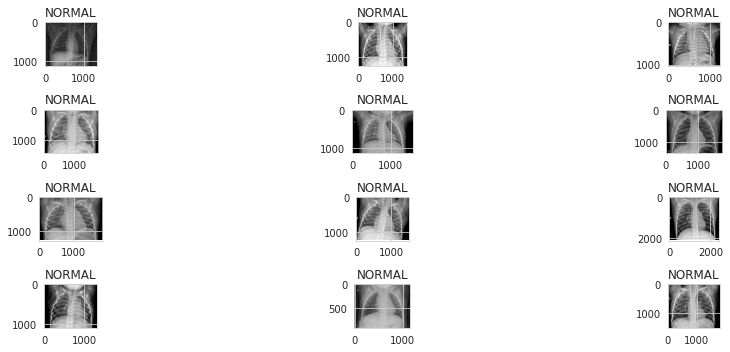

In [10]:
# Show Normal image
plt.figure(figsize=(15, 5))

for i in range(12):
    plt.subplot(4, 3, i + 1)
    img = plt.imread(os.path.join(NORMAL_dir, NORMAL[i]))
    plt.title("NORMAL")
    plt.imshow(img, cmap='gray')
    plt.axis('on')
    

plt.tight_layout()

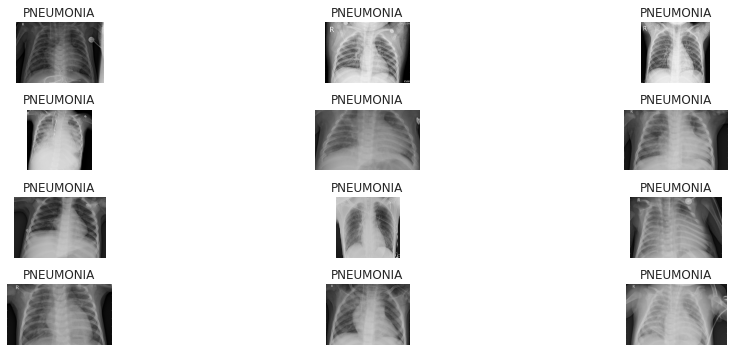

In [11]:
# shaoe PNEUMONIA image
plt.figure(figsize=(15, 5))

for i in range(12):
    plt.subplot(4, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.title("PNEUMONIA")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.tight_layout()

## Creat a Label for the data

In [12]:
import glob

pneumonia_train = glob.glob(train_dir+"/PNEUMONIA/*.jpeg")
normal_train = glob.glob(train_dir+"/NORMAL/*.jpeg")

In [13]:
# Here we creat label 0 for (Normal) 1 for( pneumonia )
data = pd.DataFrame(np.concatenate([[0]*len(normal_train) ,
                                    [1]*len(pneumonia_train)]),columns=["class"])

In [15]:
data.head(4000)

,class
0,0
1,0
2,0
3,0
4,0
...,...
3995,1
3996,1
3997,1
3998,1


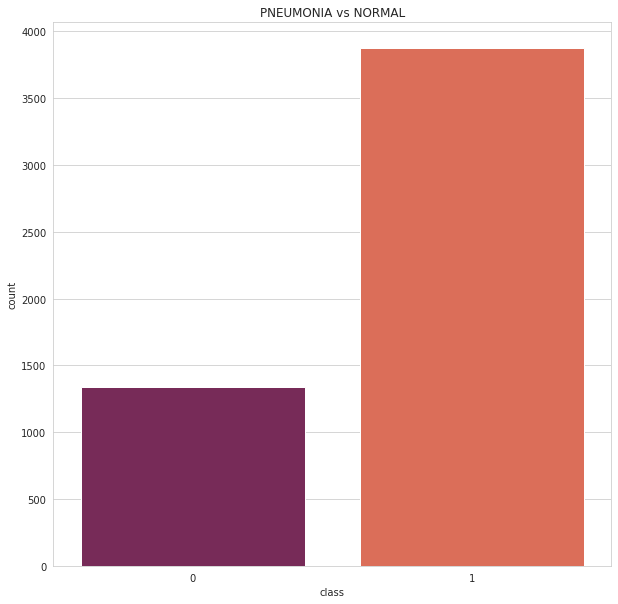

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(data['class'],data=data,palette='rocket',color='red')
plt.title('PNEUMONIA vs NORMAL')
plt.show()

# Here we can Augmented Data

In [17]:
img_Datagen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

## For Train data

In [18]:
train = img_Datagen.flow_from_directory(train_dir,
                                       batch_size=8,
                                       class_mode='binary',
#                                        target_size=(224,224,3))
                                       )

Found 5216 images belonging to 2 classes.


## For validation data

In [19]:

validation = val_Datagen.flow_from_directory(val_dir,
                                              batch_size=8,
                                              class_mode='binary',
#                                               target_size=(224,224,3))
                                            )

Found 16 images belonging to 2 classes.


## For test data

In [20]:
test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=8,
                                       class_mode='binary')

Found 624 images belonging to 2 classes.


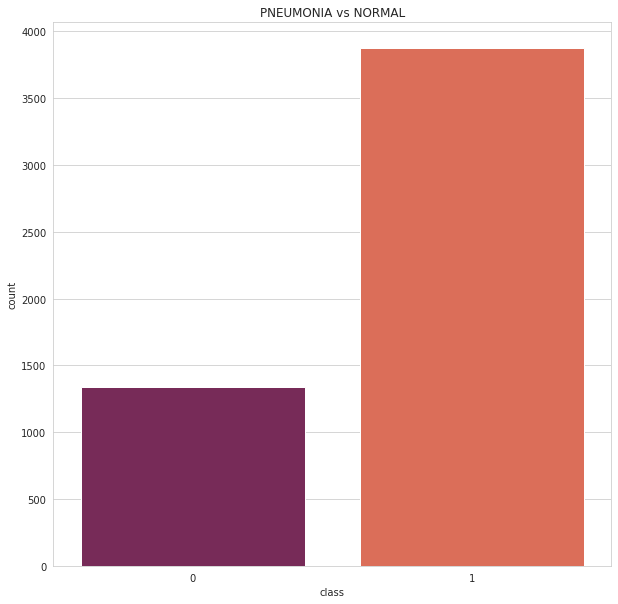

652

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(data['class'],data=data,palette='rocket',color='red')
plt.title('PNEUMONIA vs NORMAL')
plt.show()
len(train)

In [22]:
img, label = next(train)

In [23]:
print("The shape of img:",img.shape)
print("The shape of label:",label.shape)

The shape of img: (8, 256, 256, 3)
The shape of label: (8,)


# Using First Model VGG19


In [ ]:
vgg_model = tf.keras.applications.VGG19(
    weights='imagenet',
    include_top = False,
#     input_shape = (224,224,3)
)

#!pip install git+https://github.com/qubvel/segmentation_models
#import efficientnet.keras as efn 

#modeleff = efn.EfficientNetB0(weights='imagenet',include_top=False,)

#for layer in modeleff.layers:
 #   layer.trainable=False
    
x = vgg_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=vgg_model.input, outputs=predictions)

'TF_GPU_ALLOCATOR=cuda_malloc_async'

In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models
    

In [ ]:
import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

In [ ]:
vgg_model = tf.keras.applications.VGG19(
    weights='imagenet',
    include_top = False,
#     input_shape = (224,224,3)
)

from tensorflow.keras.applications import EfficientNetB0
modeleff = EfficientNetB0(weights='imagenet',include_top = False,)

for layer in modeleff.layers:
    layer.trainable=False
    
x = modeleff.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=modeleff.input, outputs=predictions)

In [ ]:
# to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)

In [ ]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['Precision'])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [ ]:
history = model.fit(train,epochs=30, 
                    validation_data=validation,
                     steps_per_epoch=50,
                    callbacks=[early_stopping,lr],
                    verbose=True,
                    batch_size=8)

# Cheak the Evaluate

In [ ]:
# Evaluating the model for  train and test
score = model.evaluate(train)

print("Train Loss is: ", score[0])
print("Train Accuracy is: ", score[1])

In [ ]:
# Test data
score = model.evaluate(test)

print("Test Loss is: ", score[0])
print("Test Accuracy is: ", score[1])

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('EVALUATION OF VGG19')

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
prediction1=model.predict(test)

In [ ]:
prediction1[:10]

# ResNet50V2

In [24]:
resnet_model = tf.keras.applications.ResNet50V2(
    weights='imagenet',
    include_top = False,
   # input_shape = (224,224,3)
)

for layer in resnet_model.layers:
    layer.trainable=False
    
x = resnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model2 = tf.keras.Model(inputs=resnet_model.input, outputs=predictions)



2022-05-02 05:26:52.539261: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 05:26:52.626313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 05:26:52.627057: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-02 05:26:52.628118: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94683136/94668760 [==============================] - 0s 0us/step


In [25]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model2, to_file='cnn-mnist.png', show_shapes=True)

In [35]:

# Compiling the model
model2.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=learning),metrics=['Precision'])

In [37]:
decay_steps=1000
initial_learning_rate=0.001
learning=tf.keras.experimental.CosineDecay(
    initial_learning_rate, decay_steps, alpha=0.0, name=None
)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
my_call=[early_stopping,learning]

In [39]:
!pip install tensorflow-addons

In [41]:
from tensorflow_addons.optimizers import CyclicalLearningRate
cyclical_learning_rate = CyclicalLearningRate(
 initial_learning_rate=3e-7,
 maximal_learning_rate=3e-5,
 step_size=2360,
 scale_fn=lambda x: 1 / (2.0 ** (x - 1)),
 scale_mode='cycle')

In [42]:
items_in_trainingset=5216
batch_size=8
maximal_learning_rate=7e-3
initial_learning_rate=maximal_learning_rate/10
epochs_within_each_step = 2
iterations_in_epoch = items_in_trainingset//batch_size
step_size = iterations_in_epoch * epochs_within_each_step
cycles = step_size * 2
training_steps= cycles * 3

In [43]:
cyclical_learning_rate_schedule = CyclicalLearningRate(
    initial_learning_rate=initial_learning_rate, 
    maximal_learning_rate=maximal_learning_rate, 
    step_size=step_size, 
    scale_fn=lambda x: 1 / (2.0 ** (x - 1)))

In [44]:
model2.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=cyclical_learning_rate_schedule),metrics=['Precision'])

In [46]:
history = model2.fit(train,epochs=50, 
                    validation_data=validation,
                     steps_per_epoch=50,
                    batch_size=8)

2022-05-02 06:05:48.496765: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-05-02 06:05:52.378431: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


50/50 [==============================] - 27s 372ms/step - loss: 0.3442 - precision: 0.8902 - val_loss: 0.4496 - val_precision: 1.0000
Epoch 2/50
50/50 [==============================] - 15s 308ms/step - loss: 0.2983 - precision: 0.9027 - val_loss: 0.2520 - val_precision: 0.8750
Epoch 3/50
50/50 [==============================] - 13s 259ms/step - loss: 0.2025 - precision: 0.9353 - val_loss: 0.2072 - val_precision: 0.8750
Epoch 4/50
50/50 [==============================] - 13s 258ms/step - loss: 0.2818 - precision: 0.9239 - val_loss: 0.4434 - val_precision: 0.7273
Epoch 5/50
50/50 [==============================] - 13s 266ms/step - loss: 0.2492 - precision: 0.9248 - val_loss: 0.2471 - val_precision: 0.7273
Epoch 6/50
50/50 [==============================] - 13s 249ms/step - loss: 0.2306 - precision: 0.9302 - val_loss: 0.1966 - val_precision: 0.8889
Epoch 7/50
50/50 [==============================] - 13s 261ms/step - loss: 0.2420 - precision: 0.9276 - val_loss: 0.2079 - val_precision: 0.8

# Evaluating the model on train and test

In [ ]:
# Evaluating the model on train 
score = model2.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

In [ ]:
# Evaluating the model test
score = model2.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
prediction2=model2.predict(test)


In [ ]:
prediction2[:10]